# **DATA ANALYSIS - "PICK_DATA"**

## Packages

### Installing packages

In [1]:
# !pip3 install numpy
# !pip3 install --upgrade pip
# !pip3 install pandas
# !pip3 install matplotlib
# ! pip3 install seaborn

### Importing packages

In [2]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from itertools import combinations
from IPython.display import clear_output

## Functions

Function that returns an overview of the **pick_data** based on all columns

In [3]:
# function that returns an overview of the pick_data based on all columns
def general_overview(pick_data):

    #get unique values for each variable
    unique_number_of_products = len(set(pick_data.product_id.values))
    unique_number_of_categories = len(set(pick_data.category.values))
    unique_number_of_source_order_ids = len(set(pick_data.source_order_id.values))
    unique_number_of_order_numbers = len(set(pick_data.order_number.values))
    unique_number_of_positions_in_order = len(set(pick_data.position_in_order.values))
    unique_number_of_quantity_unit = len(set(pick_data.quantity_unit.values))

    # print the results for a better understanding
    print("The length of the data is: ", len(pick_data))
    print("-----")
    print("-----")
    print("product_id")
    print("The number of unique product_id is: ",  unique_number_of_products)
    print("-----")
    print("category")
    print("The number of unique category is: ", unique_number_of_categories)
    print("-----")
    print("source_order_id")
    print("The number of unique source_order_id is: ", unique_number_of_source_order_ids)
    print("-----")
    print("order_number")
    print("The number of unique order_number is: ", unique_number_of_order_numbers)
    print("-----")
    print("position_in_order")
    print("The number of unique position_in_order is: ", unique_number_of_positions_in_order)
    print("-----")
    print("pick_volume")
    print("The min value of pick_volume is: ", pick_data.pick_volume.min())
    print("The max value of pick_volume is: ", pick_data.pick_volume.max())
    print("-----")
    print("quantity_unit")
    print("The number of unique quantity_unit is: ", unique_number_of_quantity_unit)
    print("-----")
    print("date_time")
    print("The first date_time of the picks_data is: ", pick_data.date_time.min())
    print("The last date_time of the picks_data is: ", pick_data.date_time.max())

Function that checks duplicate rows showing their duplicated partners based on a column selection

In [4]:
def check_duplicates_row_columns(pick_data, index_to_check, columns_to_evaluate):

    index_row_pick_data = pick_data.loc[index_to_check, columns_to_evaluate]

    matching_rows = pick_data[pick_data[columns_to_evaluate].eq(index_row_pick_data).all(axis=1)]
    
    return(matching_rows)

Function that checks if integer list is sequential

In [5]:
def is_sequential(int_list):
    
    # sort the list first (if not already sorted)
    sorted_list = sorted(int_list)

    # check if each consecutive number differs by 1
    for i in range(len(sorted_list) - 1):
        if sorted_list[i + 1] != sorted_list[i] + 1:
            return False

    return True

Function that counts the number of times a list is not sequential

In [6]:
def count_non_sequential(int_list):
    
    # sort the list first (if not already sorted)
    sorted_list = sorted(int_list)

    # Initialize a counter for non-sequential occurrences
    non_sequential_count = 0

    # check each consecutive number
    for i in range(len(sorted_list) - 1):
        if sorted_list[i + 1] != sorted_list[i] + 1:
            non_sequential_count += 1

    return non_sequential_count

## Importing data

### Importing data

In [7]:
# read cvs pick_data file
pick_data = pd.read_csv("/Users/ANDRES/Documents/GitHub/OBETAWarehousingAnalyticsProject/Data/003 pick_data.csv", header=None)

/var/folders/0m/9hrzmrmx5rvbnxjrsct8cd500000gn/T/ipykernel_4751/757817874.py:2: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  pick_data = pd.read_csv("/Users/ANDRES/Documents/GitHub/OBETAWarehousingAnalyticsProject/Data/003 pick_data.csv", header=None)


Head of data

In [8]:
# print head of data
pick_data.head()

,0,1,2,3,4,5,6,7
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24.0000000
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35.0000000
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50.0000000
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51.0000000
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02.0000000


### Matching PBI Schema

Specify columns names

In [9]:
# rename columns of data to match schema
pick_data.columns = ["product_id", "category", "source_order_id", "order_number", "position_in_order", "pick_volume", "quantity_unit", "date_time"]

Check applied changes

In [10]:
# check head of data to see if columns match
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24.0000000
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35.0000000
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50.0000000
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51.0000000
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02.0000000


Matching data types

In [11]:
# assign data types to pick_data to match schema
pick_data["product_id"] = pick_data["product_id"].astype(str)
pick_data["category"] = pick_data["category"].astype(str)
pick_data["source_order_id"] = pick_data["source_order_id"].astype(str)
pick_data["order_number"] = pick_data["order_number"].astype(str)
pick_data["position_in_order"] = pick_data["position_in_order"].astype(int)
pick_data["pick_volume"] = pick_data["pick_volume"].astype(int)
pick_data["quantity_unit"] = pick_data["quantity_unit"].astype(str)
pick_data["date_time"] = pd.to_datetime(pick_data["date_time"])

Get head of data

In [12]:
# check head of data to evaluate if any change damaged pick_data
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


### Data description

General information

In [13]:
# check all data types before data manipulation
pick_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888990 entries, 0 to 33888989
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   product_id         object        
 1   category           object        
 2   source_order_id    object        
 3   order_number       object        
 4   position_in_order  int64         
 5   pick_volume        int64         
 6   quantity_unit      object        
 7   date_time          datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 2.0+ GB


In [14]:
pick_data.describe(include="object")

,product_id,category,source_order_id,order_number,quantity_unit
count,33888990,33888990,33888990,33888990,33888990
unique,97338,5,2,6956136,9
top,109910,SHL,48,4055714,St
freq,181758,14489668,26428489,392,28621625


Top products

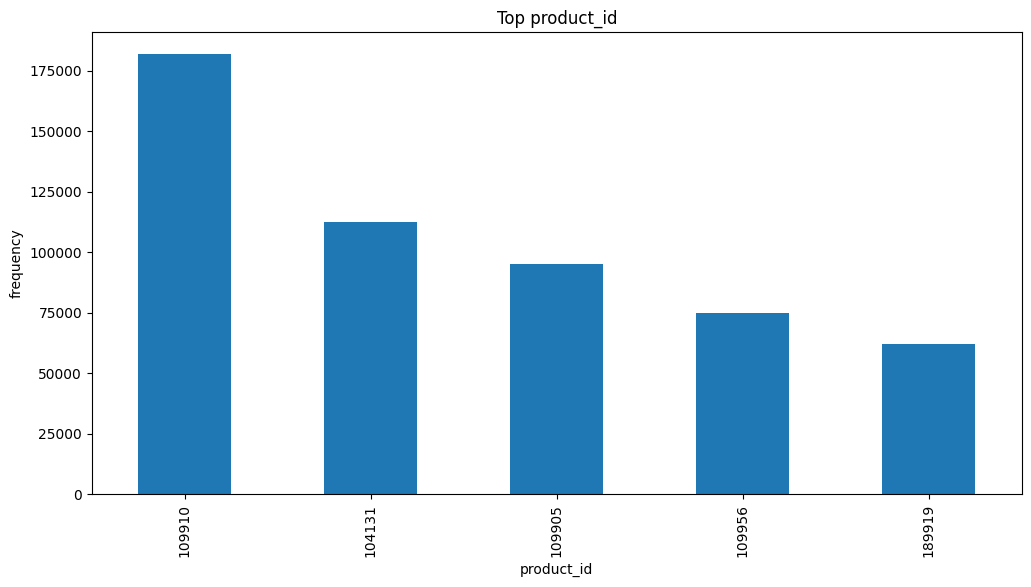

In [15]:
# column to evaluate
column_name = "product_id"

# frequency of unique values
value_counts = pick_data[column_name].value_counts()

# histogram of frequencies
plt.figure(figsize=(12, 6))
# value_counts.plot(kind="bar", logy=True)
value_counts.head(5).plot(kind="bar")
plt.title(f"Top {column_name}")
plt.xlabel("product_id")
plt.ylabel("frequency")
plt.show()

## Data manipulation

### Data consistency

#### date_time

Check if **date_time** values are consistent with other columns

In [16]:
# create new column with year of date_time
pick_data["year"] = pick_data.date_time.dt.year
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24,2017
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35,2017
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50,2017
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51,2017
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02,2017


In [17]:
# create a loop to evaluation how many products are picked from different categories
year_unique_list = sorted(list(set(pick_data.year.values)))

for i, j in list(combinations(year_unique_list, 2)):
            
    # create a merge dataframe matching the products the categories (warehouses) share with each other
    list_i = list(set(list(pick_data[pick_data["year"]==i]["order_number"].values)))
    list_j = list(set(list(pick_data[pick_data["year"]==j]["order_number"].values)))
    
    # get intersection
    common_values_i_j = set(list_i).intersection(list_j)
    
    # print the merge result
    print(i, " shares ", len(common_values_i_j), " order_number with ", j)

2011  shares  315  order_number with  2012
2011  shares  4  order_number with  2013
2011  shares  20548  order_number with  2014
2011  shares  68285  order_number with  2015
2011  shares  131756  order_number with  2016
2011  shares  21861  order_number with  2017
2011  shares  0  order_number with  2018
2011  shares  59696  order_number with  2019
2011  shares  152358  order_number with  2020
2012  shares  498  order_number with  2013
2012  shares  0  order_number with  2014
2012  shares  284  order_number with  2015
2012  shares  389984  order_number with  2016
2012  shares  48  order_number with  2017
2012  shares  1  order_number with  2018
2012  shares  264  order_number with  2019
2012  shares  165579  order_number with  2020
2013  shares  22  order_number with  2014
2013  shares  0  order_number with  2015
2013  shares  2804  order_number with  2016
2013  shares  286881  order_number with  2017
2013  shares  166  order_number with  2018
2013  shares  0  order_number with  2019
2

* There are **order_number** values that are repeting accross years
* **This is bad** since we are mixing information from past years with pick orders from later years
* Nevertheless, some order_number values may exist in consecutive years if they were initiated in the end of the first year

Visualize the problem of multiple years in one order

In [18]:
pick_data[pick_data["order_number"] == "1000574"]

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year
1832,303,HRL,48,1000574,1,3,St,2020-05-14 16:26:29,2020
6417080,296320,HRL,48,1000574,1,1,St,2019-05-23 00:04:13,2019
6417254,296324,AKL,48,1000574,2,2,St,2019-05-22 23:35:27,2019
27397895,109910,HRL,48,1000574,6,100,Mt,2015-04-17 04:15:55,2015
27403445,A80713,AKL,48,1000574,5,1,St,2015-04-17 05:48:43,2015


Create dictionary of repited **order_number** values across years

In [19]:
# create a loop to evaluation how many products are picked from different categories
year_unique_list = sorted(pick_data.year.unique())

# create dictionary for plotting
year_dict_heat = {}
for i in year_unique_list:
    year_dict_heat[str(i)] = []

# create loop of years
for i in year_unique_list:
    for j in year_unique_list:
            
        # create a merge dataframe matching the products the categories (warehouses) share with each other
        list_i = list(set(list(pick_data[pick_data["year"]==i]["order_number"].values)))
        list_j = list(set(list(pick_data[pick_data["year"]==j]["order_number"].values)))
        
        # get intersection
        common_values_i_j = set(list_i).intersection(list_j)
    
        # append to dict
        year_dict_heat[str(i)].append(len(common_values_i_j))

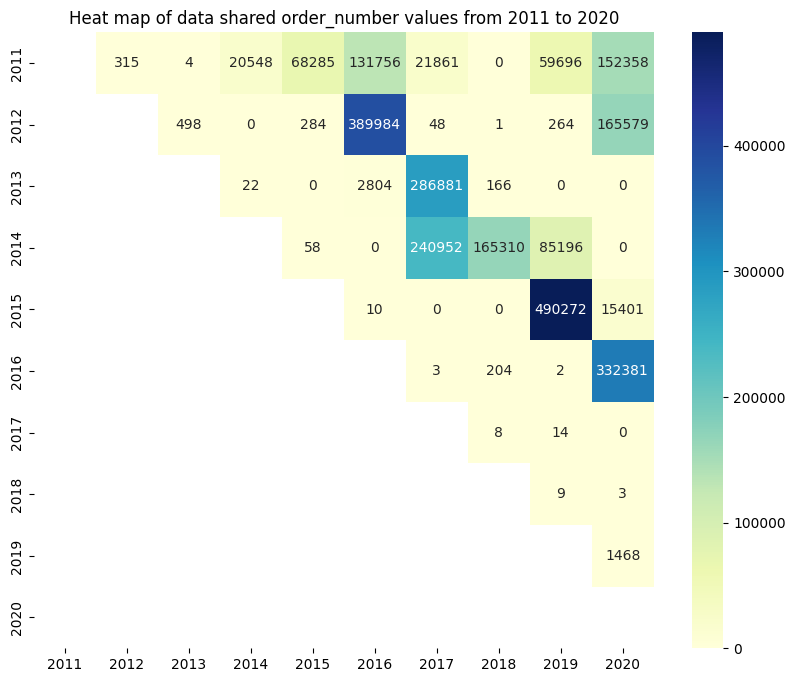

In [20]:
# set diagonal in zero
for i, year in enumerate(year_dict_heat.keys()):
    year_dict_heat[year][i] = 0

# convert dictionary to dataframe
df = pd.DataFrame(year_dict_heat)

# set the index to column names
df.index = df.columns

# create a mask for the upper triangle
mask = np.tril(np.ones_like(df, dtype=bool))

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt="d", mask=mask)
plt.title('Heat map of data shared order_number values from 2011 to 2020')
plt.show()

**First** scenario: mark orders in different years taking into account all years

In [21]:
# create a testing_dataframe for experiments
pick_data_year_drop = pick_data.copy()

# counter variable
drop_registers = 0

# create a loop to evaluation how many products are picked from different categories
year_unique_list = sorted(list(set(pick_data_year_drop.year.values)))

for i, j in list(combinations(year_unique_list, 2)):
            
    # create a merge dataframe matching the products the categories (warehouses) share with each other
    list_i = list(set(list(pick_data_year_drop[pick_data_year_drop["year"]==i]["order_number"].values)))
    list_j = list(set(list(pick_data_year_drop[pick_data_year_drop["year"]==j]["order_number"].values)))
    
    # save intesaction of data
    drop_intersaction_list = [x for x in set(list_i).intersection(list_j)]
    
    # save length of droping registers
    drop_length = len(pick_data_year_drop[pick_data_year_drop["order_number"].isin(drop_intersaction_list)])
    
    # update variable counting
    drop_registers = drop_registers + drop_length
    
    # print progress
    print(i, " shares ", len(common_values_i_j), " order_number with ", j)
    print("Droping: ", drop_length)
    
    # drop registers
    pick_data_year_drop = pick_data_year_drop[~pick_data_year_drop["order_number"].isin(drop_intersaction_list)]
    pick_data_year_drop.reset_index(drop=True, inplace=True)

2011  shares  663010  order_number with  2012
Droping:  4207
2011  shares  663010  order_number with  2013
Droping:  69
2011  shares  663010  order_number with  2014
Droping:  185690
2011  shares  663010  order_number with  2015
Droping:  657739
2011  shares  663010  order_number with  2016
Droping:  1250161
2011  shares  663010  order_number with  2017
Droping:  79787
2011  shares  663010  order_number with  2018
Droping:  0
2011  shares  663010  order_number with  2019
Droping:  211131
2011  shares  663010  order_number with  2020
Droping:  553775
2012  shares  663010  order_number with  2013
Droping:  4927
2012  shares  663010  order_number with  2014
Droping:  0
2012  shares  663010  order_number with  2015
Droping:  3827
2012  shares  663010  order_number with  2016
Droping:  3209024
2012  shares  663010  order_number with  2017
Droping:  403
2012  shares  663010  order_number with  2018
Droping:  6
2012  shares  663010  order_number with  2019
Droping:  372
2012  shares  663010  

In this **first** scenario:

In [22]:
print("Total values:         ", len(pick_data))
print("Marked values:        ", drop_registers)
print("Non-marked values:    ", len(pick_data_year_drop))

Total values:          33888990
Marked values:         16833484
Non-marked values:     17055506


**Second** scenario: drop orders in different years after having dropped years before 2017

In [23]:
# create a testing_dataframe for experiments
pick_data_year_drop_2 = pick_data.copy()

# filter year
pick_data_year_drop_2 = pick_data_year_drop_2[pick_data_year_drop_2["year"] >= 2017]
pick_data_year_drop_2.reset_index(drop=True, inplace=True)

# counter variable
drop_registers_2 = 0

# create a loop to evaluation how many products are picked from different categories
year_unique_list = sorted(list(set(pick_data_year_drop_2.year.values)))

for i, j in list(combinations(year_unique_list, 2)):
            
    # create a merge dataframe matching the products the categories (warehouses) share with each other
    list_i = list(set(list(pick_data_year_drop_2[pick_data_year_drop_2["year"]==i]["order_number"].values)))
    list_j = list(set(list(pick_data_year_drop_2[pick_data_year_drop_2["year"]==j]["order_number"].values)))
    
    # save intesaction of data
    drop_intersaction_list = [x for x in set(list_i).intersection(list_j)]
    
    # save length of droping registers
    drop_length = len(pick_data_year_drop_2[pick_data_year_drop_2["order_number"].isin(drop_intersaction_list)])
    
    # update variable counting
    drop_registers_2 = drop_registers_2 + drop_length
    
    # print progress
    print(i, " shares ", len(common_values_i_j), " order_number with ", j)
    print("Droping: ", drop_length)
    
    # drop registers
    pick_data_year_drop_2 = pick_data_year_drop_2[~pick_data_year_drop_2["order_number"].isin(drop_intersaction_list)]
    pick_data_year_drop_2.reset_index(drop=True, inplace=True)

2017  shares  663010  order_number with  2018
Droping:  38
2017  shares  663010  order_number with  2019
Droping:  80
2017  shares  663010  order_number with  2020
Droping:  0
2018  shares  663010  order_number with  2019
Droping:  41
2018  shares  663010  order_number with  2020
Droping:  10
2019  shares  663010  order_number with  2020
Droping:  12581


In this **second** scenario:

In [24]:
print("Total values:         ", len(pick_data))
print("Marked values:        ", drop_registers_2)
print("Non-marked values:    ", len(pick_data_year_drop_2))

Total values:          33888990
Marked values:         12750
Non-marked values:     16046699


> **Second** option is better since we mark just 12.750 picks

Check if same order passes from one year to another from dezember to january

In [25]:
list_consecutive_years = [(2011,2012),
                          (2012,2013),
                          (2013,2014),
                          (2014,2015),
                          (2015,2016),
                          (2016,2017),
                          (2017,2018),
                          (2018,2019),
                          (2019,2020)]

for i, j in list_consecutive_years:

    a = list(set(list(pick_data[(pick_data["date_time"]>=str(i)+"-12-01 11:59:59") &
                                      (pick_data["date_time"]<=str(i)+"-12-31 11:59:59")]["order_number"].values)))
    b = list(set(list(pick_data[(pick_data["date_time"]>=str(j)+"-01-01 00:00:00") &
                                      (pick_data["date_time"]<=str(j)+"-01-31 11:59:59")]["order_number"].values)))
    
    common_values_i_j = set(a).intersection(b)
    
    # print the merge result
    print(i, " shares ", len(common_values_i_j), " order_number with ", j)

2011  shares  63  order_number with  2012
2012  shares  5  order_number with  2013
2013  shares  22  order_number with  2014
2014  shares  58  order_number with  2015
2015  shares  8  order_number with  2016
2016  shares  3  order_number with  2017
2017  shares  1  order_number with  2018
2018  shares  2  order_number with  2019
2019  shares  19  order_number with  2020


* Orders may exist in consecutive years
* We have to check the patern in the repited orders in several years

Visualization of same orders that are jumping from one year to other years (source_order_id = 46)

In [26]:
# create a loop to track repeated order_number over the years
year_unique_list = sorted(pick_data.year.unique())

# create dictionary for plotting
year_dict_heat_46 = {}
for i in year_unique_list:
    year_dict_heat_46[str(i)] = []

# for loop for years
for i in year_unique_list:

    # get unique list of order_number values from a year i
    year_order_number_unique_list_i = pick_data[(pick_data["year"]==i) & (pick_data["source_order_id"]=="46")]["order_number"].unique()
        
    # for loop for years
    for j in year_unique_list:

        # avoid analysis between same year
        if i > j:    
            
            # get unique list of order_number values from a year j
            year_order_number_unique_list_j = pick_data[(pick_data["year"]==j) & (pick_data["source_order_id"]=="46")]["order_number"].unique()
            
            # get intersection
            common_values_i_j = set(year_order_number_unique_list_i).intersection(year_order_number_unique_list_j)
    
            # append to dict
            year_dict_heat_46[str(i)].append(len(common_values_i_j))
            
        # assign zero value
        else:
            
            # append to dict
            year_dict_heat_46[str(i)].append(0)

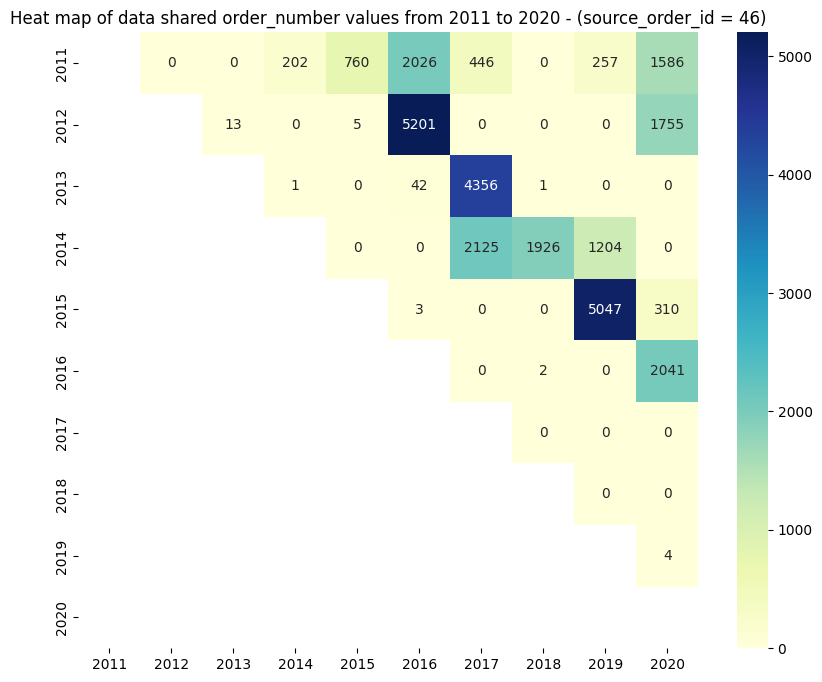

In [27]:
# set diagonal in zero
for i, year in enumerate(year_dict_heat_46.keys()):
    year_dict_heat_46[year][i] = 0

# convert dictionary to dataframe
df = pd.DataFrame(year_dict_heat_46)

# set the index to column names
df.index = df.columns

# create a mask for the upper triangle
mask = np.tril(np.ones_like(df, dtype=bool))

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt="d", mask=mask)
plt.title('Heat map of data shared order_number values from 2011 to 2020 - (source_order_id = 46)')
plt.show()

Visualization of same orders that are jumping from one year to other years (source_order_id = 48)

In [28]:
# create a loop to track repeated order_number over the years
year_unique_list = sorted(pick_data.year.unique())

# create dictionary for plotting
year_dict_heat_48 = {}
for i in year_unique_list:
    year_dict_heat_48[str(i)] = []

# for loop for years
for i in year_unique_list:

    # get unique list of order_number values from a year i
    year_order_number_unique_list_i = pick_data[(pick_data["year"]==i) & (pick_data["source_order_id"]=="48")]["order_number"].unique()
        
    # for loop for years
    for j in year_unique_list:

        # avoid analysis between same year
        if i > j:    
            
            # get unique list of order_number values from a year j
            year_order_number_unique_list_j = pick_data[(pick_data["year"]==j) & (pick_data["source_order_id"]=="48")]["order_number"].unique()
            
            # get intersection
            common_values_i_j = set(year_order_number_unique_list_i).intersection(year_order_number_unique_list_j)
    
            # append to dict
            year_dict_heat_48[str(i)].append(len(common_values_i_j))
            
        # assign zero value
        else:
            
            # append to dict
            year_dict_heat_48[str(i)].append(0)

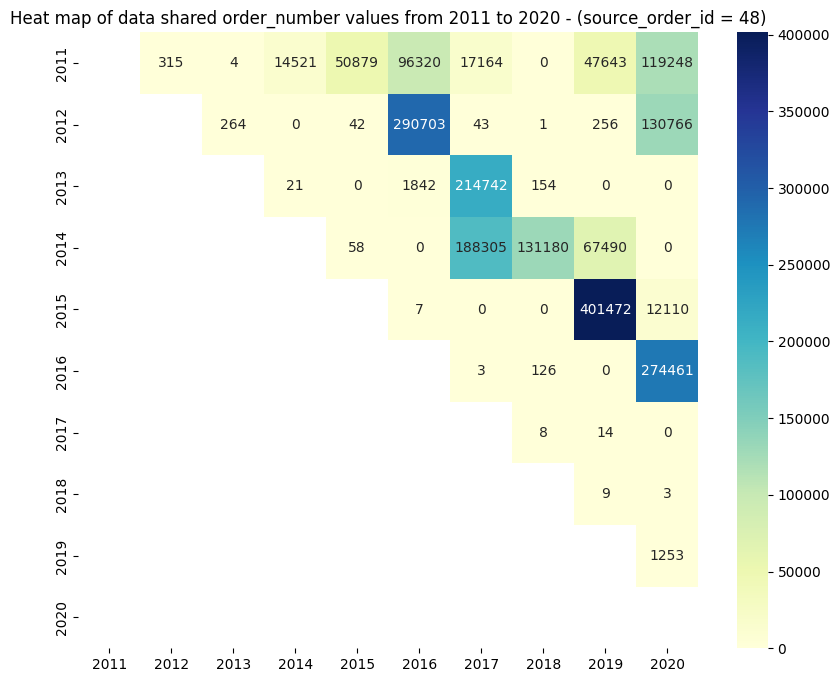

In [29]:
# set diagonal in zero
for i, year in enumerate(year_dict_heat_48.keys()):
    year_dict_heat_48[year][i] = 0

# convert dictionary to dataframe
df = pd.DataFrame(year_dict_heat_48)

# set the index to column names
df.index = df.columns

# create a mask for the upper triangle
mask = np.tril(np.ones_like(df, dtype=bool))

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt="d", mask = mask)
plt.title('Heat map of data shared order_number values from 2011 to 2020 - (source_order_id = 48)')
plt.show()

##### Flag (1): order repeated in different years

Create pick_id to flaging process

In [30]:
pick_data["pick_id"]=pick_data.index
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24,2017,0
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35,2017,1
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50,2017,2
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51,2017,3
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02,2017,4


In [31]:
# list of indexes to mark with flag 1
flag_1_index_list = []

# create a loop to track repeated order_number over the years
year_unique_list = sorted(pick_data.year.unique())

# for loop for years
for i in year_unique_list:

    # get unique list of order_number values from a year i
    year_i = pick_data[pick_data["year"]==i]
        
    # for loop for years
    for j in year_unique_list:

        # avoid analysis between same year
        if i > j:    
            
            # get unique list of order_number values from a year j
            year_j = pick_data[pick_data["year"]==j]
            
            # get merged dataframe
            merged_df = pd.merge(year_i, year_j, on="order_number", how="inner")
            
            # append index values to flag 1 list
            flag_1_index_list = flag_1_index_list + list(merged_df["pick_id_x"].unique())
            flag_1_index_list = flag_1_index_list + list(merged_df["pick_id_y"].unique())
            
# set flag 1 index list
flag_1_index_list = set(flag_1_index_list)

In [32]:
# create a flag 1 column with 1 and 0
pick_data["flag_1"] = pick_data.index.isin(flag_1_index_list).astype(int)

In [33]:
# marked vlaues
len(pick_data[pick_data["flag_1"]==1])

16833484

#### product_id

Check if **product_id** values are homogeneous

In [34]:
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id,flag_1
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24,2017,0,0
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35,2017,1,0
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50,2017,2,0
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51,2017,3,0
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02,2017,4,0


In [35]:
all(x.isdigit() for x in list(set(list(pick_data["product_id"].values))))

False

* **product_id** values are not always numerical, but it can't be taken as an inconsistency

#### category

Check if products come from the same category everytime

In [36]:
# check data in category
print(set(pick_data.category.values))

{'Kabellager', 'HRL', 'AKL', 'SHL', 'Manuell'}


In [37]:
# create a loop to evaluation how many products are picked from different categories

category_unique_list = list(set(pick_data.category.values))

for i, j in list(combinations(category_unique_list, 2)):
            
            # create a merge dataframe matching the products the categories (warehouses) share with each other
            list_i = list(set(list(pick_data[pick_data["category"]==i]["product_id"].values)))
            list_j = list(set(list(pick_data[pick_data["category"]==j]["product_id"].values)))
            
            # compare lists to identify common values
            common_values_i_j = [x for x in list_i if x in list_j]
            
            # print the merge result
            print(i, " shares ", len(common_values_i_j), " product_id with ", j)

Kabellager  shares  550  product_id with  HRL
Kabellager  shares  5  product_id with  AKL
Kabellager  shares  0  product_id with  SHL
Kabellager  shares  29  product_id with  Manuell
HRL  shares  2452  product_id with  AKL
HRL  shares  1622  product_id with  SHL
HRL  shares  178  product_id with  Manuell
AKL  shares  42198  product_id with  SHL
AKL  shares  11  product_id with  Manuell
SHL  shares  9  product_id with  Manuell


* Same **product_id** values can be picked from **different category** values: different warehouses

In [38]:
pick_data.pivot_table(
    index="category",
    columns="source_order_id",
    values="position_in_order",
    aggfunc="max")

source_order_id,46,48
category,,
AKL,85,327
HRL,75,244
Kabellager,44,157
Manuell,44,324
SHL,85,436


> When the **source_order_id** is **46**, the **max position_in_order** is no grater than **85** in any warehouse

> Warehouses **AKL**, **Manuell**, **SHL** are the houses with greater **position_in_order**

In [39]:
pick_data.pivot_table(
    index="category",
    columns="source_order_id",
    values="order_number",
    aggfunc="count")

source_order_id,46,48
category,,
AKL,3054740,8384293
HRL,1076252,3046273
Kabellager,96609,1808663
Manuell,262131,1670361
SHL,2970769,11518899


> Warehouses **AKL**, **HRL**, **SHL** have the **greater number of orders received** accross order types (**46**, **48**)

#### source_order_id

Check if **source_order_id** can vary in the same **order_number**

In [40]:
# check data in source_order_id
print(pick_data.source_order_id.unique())

['48' '46']


In [41]:
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id,flag_1
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24,2017,0,0
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35,2017,1,0
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50,2017,2,0
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51,2017,3,0
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02,2017,4,0


In [42]:
# check how many times 48 and 46 are sharing orders accross the entire dataset
order_source_set_48 = list(pick_data[pick_data["source_order_id"] == "48"]["order_number"].unique())
order_source_set_46 = list(pick_data[pick_data["source_order_id"] == "46"]["order_number"].unique())

# common orders between source_order_id
common_source_order_order_number = set(order_source_set_48).intersection(order_source_set_46)

print("The number of same order_number shared between 46 & 48: ", len(common_source_order_order_number))

The number of same order_number shared between 46 & 48:  475719


* There shouldn't be any shared orders between **source_order_id** since each order should have just one origin

##### Flag (2): one single order_number has different source_order_id values

In [43]:
# list of indexes to mark with flag 2
flag_2_index_list = []

# create a loop to track repeated order_number over source
source_unique_list = sorted(pick_data.source_order_id.unique())

# for loop for years
for i in source_unique_list:

    # get unique list of order_number values from source
    source_i = pick_data[pick_data["source_order_id"]==i]
        
    # for loop for years
    for j in source_unique_list:

        # avoid analysis between same source
        if i != j:    
            
            # get unique list of order_number values from a source
            source_j = pick_data[pick_data["source_order_id"]==j]
            
            # get merged dataframe
            merged_df = pd.merge(source_i, source_j, on="order_number", how="inner")
            
            # append index values to flag 1 list
            flag_2_index_list = flag_2_index_list + list(merged_df["pick_id_x"].unique())
            flag_2_index_list = flag_2_index_list + list(merged_df["pick_id_y"].unique())
            
# set flag 1 index list
flag_2_index_list = set(flag_2_index_list)

In [44]:
# create a flag 1 column with 1 and 0
pick_data['flag_2'] = pick_data.index.isin(flag_2_index_list).astype(int)

Check the length of the unique **order_number** marked with flag_2

In [45]:
# marked values
len(pick_data[pick_data["flag_2"]==1]["order_number"].unique())

475719

Check the length of the total picks marked with flag_2

In [46]:
len(pick_data[pick_data["flag_2"]==1])

5216308

See one example

In [47]:
pick_data[(pick_data["flag_2"]==1) & (pick_data["order_number"] == "7069312")]

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id,flag_1,flag_2
24,2,AKL,48,7069312,1,25,St,2017-07-04 22:29:29,2017,24,1,1
16178904,K54760,AKL,46,7069312,1,4,Pa,2013-12-10 10:25:12,2013,16178904,1,1


#### quantity_unit

Check unique **quantity_unit** values

In [48]:
# check data in source_order_id
print(list(pick_data.quantity_unit.unique()))

['St', 'Mt', 'Se', 'Ro', 'Bl', 'Ei', 'Pa', 'VE', 'kg']


Evaluate if quantity units are consistent for each product

In [49]:
# create empty dict for interation
quantity_unit_product_dict = {}

# create a set of unique product_id values for each quantity unit
product_list_St = list(set(pick_data[pick_data["quantity_unit"] == "St"]["product_id"].values))
product_list_Mt = list(set(pick_data[pick_data["quantity_unit"] == "Mt"]["product_id"].values))
product_list_Ei = list(set(pick_data[pick_data["quantity_unit"] == "Ei"]["product_id"].values))
product_list_kg = list(set(pick_data[pick_data["quantity_unit"] == "kg"]["product_id"].values))
product_list_Ro = list(set(pick_data[pick_data["quantity_unit"] == "Ro"]["product_id"].values))
product_list_Bl = list(set(pick_data[pick_data["quantity_unit"] == "Bl"]["product_id"].values))
product_list_VE = list(set(pick_data[pick_data["quantity_unit"] == "VE"]["product_id"].values))
product_list_Pa = list(set(pick_data[pick_data["quantity_unit"] == "Pa"]["product_id"].values))
product_list_Se = list(set(pick_data[pick_data["quantity_unit"] == "Se"]["product_id"].values))

# configure dictionary
quantity_unit_product_dict["product_list_St"] = product_list_St
quantity_unit_product_dict["product_list_Mt"] = product_list_Mt
quantity_unit_product_dict["product_list_Ei"] = product_list_Ei
quantity_unit_product_dict["product_list_kg"] = product_list_kg
quantity_unit_product_dict["product_list_Ro"] = product_list_Ro
quantity_unit_product_dict["product_list_Bl"] = product_list_Bl
quantity_unit_product_dict["product_list_VE"] = product_list_VE
quantity_unit_product_dict["product_list_Pa"] = product_list_Pa
quantity_unit_product_dict["product_list_Se"] = product_list_Se

# common orders between source_order_id
for i, j in list(combinations(list(quantity_unit_product_dict.keys()), 2)):
    common_product_id_quantity_unit = set(quantity_unit_product_dict[i]).intersection(quantity_unit_product_dict[j])
    print("The quantity_unit ", i[-2:], " shares ", len(common_product_id_quantity_unit), " product_id with ", j[-2:])

The quantity_unit  St  shares  7  product_id with  Mt
The quantity_unit  St  shares  0  product_id with  Ei
The quantity_unit  St  shares  0  product_id with  kg
The quantity_unit  St  shares  0  product_id with  Ro
The quantity_unit  St  shares  5  product_id with  Bl
The quantity_unit  St  shares  33  product_id with  VE
The quantity_unit  St  shares  28  product_id with  Pa
The quantity_unit  St  shares  0  product_id with  Se
The quantity_unit  Mt  shares  0  product_id with  Ei
The quantity_unit  Mt  shares  0  product_id with  kg
The quantity_unit  Mt  shares  0  product_id with  Ro
The quantity_unit  Mt  shares  0  product_id with  Bl
The quantity_unit  Mt  shares  0  product_id with  VE
The quantity_unit  Mt  shares  0  product_id with  Pa
The quantity_unit  Mt  shares  0  product_id with  Se
The quantity_unit  Ei  shares  0  product_id with  kg
The quantity_unit  Ei  shares  0  product_id with  Ro
The quantity_unit  Ei  shares  0  product_id with  Bl
The quantity_unit  Ei  sha

Get intersection between two product's quantity units

In [50]:
set(quantity_unit_product_dict["product_list_St"]).intersection(quantity_unit_product_dict["product_list_Mt"])

{'451123', '451124', '500917', '500918', '500919', '851388', '851389'}

In [51]:
pick_data[(pick_data["product_id"] == '451123') & (pick_data["quantity_unit"] == 'St')][0:1]

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id,flag_1,flag_2
29180207,451123,HRL,48,1985384,1,1,St,2015-11-03 10:54:04,2015,29180207,1,0


In [52]:
pick_data[(pick_data["product_id"] == '451123') & (pick_data["quantity_unit"] == 'Mt')][0:1]

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id,flag_1,flag_2
8022830,451123,Kabellager,46,6601329,4,2000,Mt,2017-03-31 10:16:49,2017,8022830,0,0


* We see that there are some **product_id** values that are measured in **different quantities**

Visualize the shared quantity units between across products

In [53]:
# create a loop to track different quantity types in one product
quantity_unique_list = list(pick_data.quantity_unit.unique())

# create dictionary for plotting
quantity_dict_heat = {}
for i in quantity_unique_list:
    quantity_dict_heat[i] = []

# for loop over quantity types
for i in quantity_unique_list:

    # get unique list of order_number values from a year i
    quantity_product_unique_list_i = pick_data[pick_data["quantity_unit"]==i]["product_id"].unique()
        
    # for loop for years
    for j in quantity_unique_list:

        # avoid analysis between same year
        if i != j:
            
            # get unique list of order_number values from a year j
            quantity_product_unique_list_j = pick_data[pick_data["quantity_unit"]==j]["product_id"].unique()
            
            # get intersection
            common_values_i_j = set(quantity_product_unique_list_i).intersection(quantity_product_unique_list_j)
    
            # append to dict
            quantity_dict_heat[str(i)].append(len(common_values_i_j))
            
        # assign zero value
        else:
            
            # append to dict
            quantity_dict_heat[i].append(0)

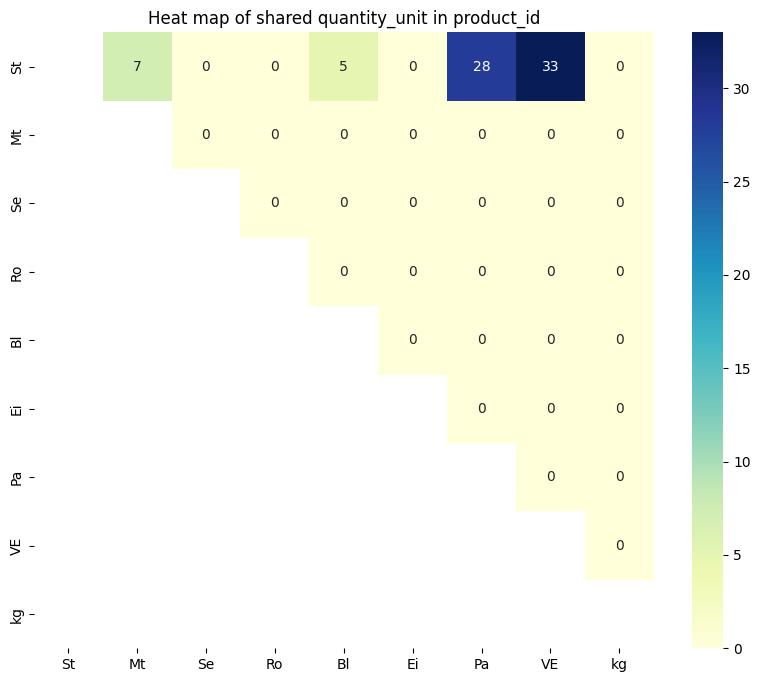

In [54]:
# set diagonal in zero
for i, unit in enumerate(quantity_dict_heat.keys()):
    quantity_dict_heat[unit][i] = 0

# convert dictionary to dataframe
df = pd.DataFrame(quantity_dict_heat)

# set the index to column names
df.index = df.columns

# create a mask for the upper triangle
mask = np.tril(np.ones_like(df, dtype=bool))

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt="d", mask = mask)
plt.title("Heat map of shared quantity_unit in product_id")
plt.show()


##### Flag (3): Some product_id values are measured in different quantity_unit values

In [55]:
# list of indexes to mark with flag 3
flag_3_index_list = []

# create a loop to track multiple quantity_unit over product_id
quantity_unique_list = pick_data.quantity_unit.unique()

# for loop over quantity units
for i in quantity_unique_list:

    # get unique df of product_id values from quantity_unit
    quanity_i = pick_data[pick_data["quantity_unit"]==i]
        
    # for loop for years
    for j in quantity_unique_list:

        # avoid analysis between same source
        if i != j:    
            
            # get unique df of product_id values from quantity_unit
            quanity_j = pick_data[pick_data["quantity_unit"]==j]
            
            # get merged dataframe
            merged_df = pd.merge(quanity_i, quanity_j, on="product_id", how="inner")
            
            # append index values to flag 3 list
            flag_3_index_list = flag_3_index_list + list(merged_df["pick_id_x"].unique())
            flag_3_index_list = flag_3_index_list + list(merged_df["pick_id_y"].unique())
            
# set flag 1 index list
flag_3_index_list = set(flag_3_index_list)

In [56]:
# create a flag 1 column with 1 and 0
pick_data['flag_3'] = pick_data.index.isin(flag_3_index_list).astype(int)

Check marked values

In [57]:
# marked values
len(pick_data[pick_data["flag_3"]==1])

5209

#### position_in_order

Get the list of unique positions across all orders

In [58]:
# check data in position_in_order
position_in_order_set_list = list(set([int(x) for x in pick_data.position_in_order.values]))
print(position_in_order_set_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

* **position_in_order** seems to be **semi-continous** so it's a good idea to check some examples of how that variable behaviors in some **order_number** cases

Create a scatter plot over variable **position_in_order** to evaluate variable behavior

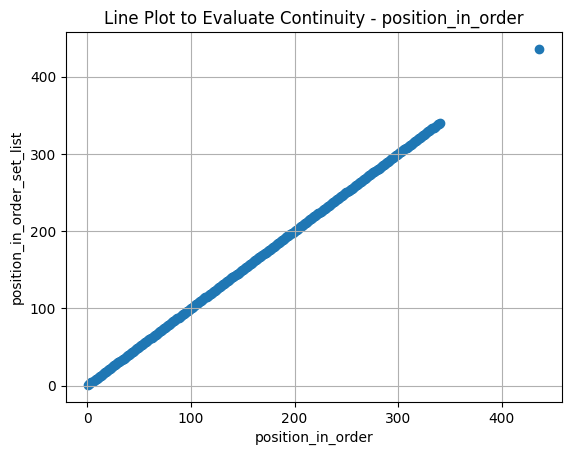

In [59]:
plt.scatter(position_in_order_set_list, position_in_order_set_list)
plt.title("Line Plot to Evaluate Continuity - position_in_order")
plt.xlabel("position_in_order")
plt.ylabel("position_in_order_set_list")
plt.grid(True)
plt.show()

* We clearly see that there's a break in the sequence after max position > 300

Check number of breaks in the sequence of **position_in_order**

In [60]:
sequential_count = count_non_sequential(position_in_order_set_list)
print("Max. position: ", sorted(position_in_order_set_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(position_in_order_set_list) == 0:
    print("The position_in_order_set_list: IS sequential")
else:
    print("The position_in_order_set_list: IS NOT sequential")

Max. position:  436
Number of breaks:  2
The position_in_order_set_list: IS NOT sequential


* **position_in_order** is a **non-continuous semi-continuous** variable with **two breaks**

> We proceed to theck the behavior of the variable **position_in_order** within a giving **order_number**

Check if **position_in_order** is a continues sequence from **1** to **n**

In [61]:
# check random order_number with position_in_order > 300
random_position = pick_data[pick_data["position_in_order"] > 300].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id,flag_1,flag_2,flag_3
13204980,P90454,SHL,48,7107682,1,67,St,2017-07-11 11:29:34,2017,13204980,1,0,0
13204979,P90454,SHL,48,7107682,1,80,St,2017-07-11 11:22:26,2017,13204979,1,0,0
16117697,P99724,Manuell,48,7107682,1,42,Mt,2013-12-17 00:37:01,2013,16117697,1,0,0
13204964,P90450,AKL,48,7107682,2,14,St,2017-07-11 12:25:34,2017,13204964,1,0,0
16117889,Q01195,AKL,48,7107682,2,10,St,2013-12-17 02:08:48,2013,16117889,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612396,A05051,SHL,48,7107682,335,10,St,2017-07-11 12:20:42,2017,8612396,1,0,0
13207274,P90522,SHL,48,7107682,336,1,St,2017-07-11 14:09:08,2017,13207274,1,0,0
9242370,C13855,SHL,48,7107682,338,2,St,2017-07-11 14:12:06,2017,9242370,1,0,0
13212735,P90889,SHL,48,7107682,339,1,St,2017-07-11 14:09:08,2017,13212735,1,0,0


In [62]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  340
Number of breaks:  2
The order_number:  7107682  IS NOT sequential


In [63]:
# check random order_number with position_in_order > 400
random_position = pick_data[pick_data["position_in_order"] > 400].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")
# pick_data[(pick_data["order_number"] == random_position) & (pick_data["category"] == "SHL")].sort_values(by="date_time")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id,flag_1,flag_2,flag_3
16067218,S04220,AKL,46,7140205,1,2,St,2013-12-27 04:21:27,2013,16067218,1,1,0
10476032,G41665,SHL,48,7140205,1,134,St,2017-07-17 15:14:29,2017,10476032,1,1,0
10393501,G41650,SHL,48,7140205,2,5,St,2017-07-17 15:14:29,2017,10393501,1,1,0
10393500,G41650,HRL,48,7140205,2,160,St,2017-07-17 14:59:04,2017,10393500,1,1,0
4918876,243603,SHL,48,7140205,3,12,St,2017-07-17 15:22:12,2017,4918876,1,1,0
4918875,243603,SHL,48,7140205,3,70,St,2017-07-17 15:11:00,2017,4918875,1,1,0
10585391,G41816,SHL,48,7140205,4,86,St,2017-07-17 15:22:12,2017,10585391,1,1,0
10631239,G42023,SHL,48,7140205,5,1,St,2017-07-17 15:45:14,2017,10631239,1,1,0
10631238,G42023,SHL,48,7140205,5,60,St,2017-07-17 15:22:12,2017,10631238,1,1,0
4963528,243609,SHL,48,7140205,6,61,St,2017-07-17 15:45:14,2017,4963528,1,1,0


In [64]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  436
Number of breaks:  10
The order_number:  7140205  IS NOT sequential


> From the previous analysis we can check different things:

1) The grater the max position_in_order, the more number of breaks in the the sequence of the   variable (1; n)

2) We won't mark te picks whose position_in_order are high, or that create a disconituity

### Missing values

Checking missing values over all columns

In [65]:
# check count of missing values for each variable 
pick_data.isna().sum()

product_id           0
category             0
source_order_id      0
order_number         0
position_in_order    0
pick_volume          0
quantity_unit        0
date_time            0
year                 0
pick_id              0
flag_1               0
flag_2               0
flag_3               0
dtype: int64

* Since there are no missing values, we can assume that the data is complete and we can proceed to validate the consistency of the variables

### Duplicates

#### General analysis

Check duplicates based on **all columns**

In [66]:
# get duplicates dataframe over the all columns
duplicates_pick_date = pick_data.duplicated(subset = 
                                            ["product_id",
                                             "category",
                                             "source_order_id",
                                             "order_number",
                                             "position_in_order",
                                             "pick_volume",
                                             "quantity_unit",
                                             "date_time"])
pick_data[duplicates_pick_date].head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id,flag_1,flag_2,flag_3
14,2,SHL,48,7055448,1,22,St,2017-06-30 12:50:40,2017,14,0,0,0
68,12,AKL,48,8197426,3,4,St,2018-01-30 12:55:47,2018,68,0,0,0
626,99,SHL,48,3302027,1,4,St,2020-07-14 07:00:04,2020,626,1,0,0
1327,255,Manuell,48,8883282,1,8,St,2018-11-21 00:33:42,2018,1327,0,0,0
1998,384,SHL,48,1854647,1,1,St,2019-10-23 10:55:28,2019,1998,0,0,0


* We see that there are perfect duplicates

Get total length of perfect matches

In [67]:
# get the count of duplicated values
print(len(pick_data[duplicates_pick_date]))

8024


* We see that **8.024** rows are duplicates evaluating **all columns**

In [68]:
pick_data[duplicates_pick_date].pivot_table(
    index="category",
    columns="source_order_id",
    values="order_number",
    aggfunc="count")

source_order_id,46,48
category,,
AKL,NaN,21.0
HRL,1.0,NaN
Kabellager,313.0,1001.0
Manuell,631.0,2307.0
SHL,668.0,3082.0


> Warehouse **SHL**, **Manuell**, **Kabellager** have the most number of perfect duplicates

> Warehouses **AKL** and **HRL** are the ones with less duplicates

#### Specific analysis

Check one duplicate example based on **all** column before taking any decission

In [69]:
# check the duplicated cases for row 14 over all columns (because we saw the index in the previous output)
index_to_check = 1327
columns_to_evaluate = ["product_id", "category", "source_order_id", "order_number", "position_in_order", "pick_volume", "quantity_unit", "date_time"]

check_duplicates_row_columns(pick_data, index_to_check, columns_to_evaluate)

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id,flag_1,flag_2,flag_3
1326,255,Manuell,48,8883282,1,8,St,2018-11-21 00:33:42,2018,1326,0,0,0
1327,255,Manuell,48,8883282,1,8,St,2018-11-21 00:33:42,2018,1327,0,0,0


* This is one of the **8.024** cases where registers are **exactly the same**

> Comparing this register with another register that doesn't follow this behavior

Getting registers **outside** the behavior of perfect duplicates

In [70]:
pick_data[~duplicates_pick_date].head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id,flag_1,flag_2,flag_3
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24,2017,0,0,0,0
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35,2017,1,0,0,0
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50,2017,2,0,0,0
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51,2017,3,0,0,0
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02,2017,4,0,0,0


Check one **orde_number** that is **outside** the behavior of perfect duplicates

In [71]:
pick_data[pick_data["order_number"]=="7055448"].head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id,flag_1,flag_2,flag_3
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24,2017,0,0,0,0
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35,2017,1,0,0,0
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50,2017,2,0,0,0
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51,2017,3,0,0,0
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02,2017,4,0,0,0


* We see the **picks** are placed in a way that **date_time** and **pick_volume** could actually **overlap** within an **order_number**

> **Not recommendable to drop duplicates for several reasons:**

    1) We don't have a unique ID for pick_data, wich makes it difficult to make decissions over duplicates

    2) Orders are placed in a way that date_time and pick_volme can overlap within an order_number

##### Flag (4): Duplicates taking into account all columns​ (perfect duplicates)

In [72]:
# create a flag 4 column with 1 and 0
pick_data["flag_4"] = duplicates_pick_date.astype(int)

Check marked values

In [73]:
pick_data[pick_data["flag_4"] == 1]

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id,flag_1,flag_2,flag_3,flag_4
14,2,SHL,48,7055448,1,22,St,2017-06-30 12:50:40,2017,14,0,0,0,1
68,12,AKL,48,8197426,3,4,St,2018-01-30 12:55:47,2018,68,0,0,0,1
626,99,SHL,48,3302027,1,4,St,2020-07-14 07:00:04,2020,626,1,0,0,1
1327,255,Manuell,48,8883282,1,8,St,2018-11-21 00:33:42,2018,1327,0,0,0,1
1998,384,SHL,48,1854647,1,1,St,2019-10-23 10:55:28,2019,1998,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33847506,V31990,SHL,46,4155106,11,50,St,2016-12-21 02:18:12,2016,33847506,0,0,0,1
33855823,809865,Kabellager,48,4164487,1,500,Mt,2016-12-22 09:36:51,2016,33855823,1,1,0,1
33877874,R77601,SHL,46,6100466,7,20,St,2016-12-27 07:31:43,2016,33877874,1,1,0,1
33885522,809840,Kabellager,48,6104893,1,500,Mt,2016-12-28 15:58:01,2016,33885522,1,0,0,1


### Outliers

Overview of pick_data 

In [74]:
# checking structure of data
pick_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888990 entries, 0 to 33888989
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   product_id         object        
 1   category           object        
 2   source_order_id    object        
 3   order_number       object        
 4   position_in_order  int64         
 5   pick_volume        int64         
 6   quantity_unit      object        
 7   date_time          datetime64[ns]
 8   year               int32         
 9   pick_id            int64         
 10  flag_1             int64         
 11  flag_2             int64         
 12  flag_3             int64         
 13  flag_4             int64         
dtypes: datetime64[ns](1), int32(1), int64(7), object(5)
memory usage: 3.4+ GB


In [75]:
# get a general overview
general_overview(pick_data)

The length of the data is:  33888990
-----
-----
product_id
The number of unique product_id is:  97338
-----
category
The number of unique category is:  5
-----
source_order_id
The number of unique source_order_id is:  2
-----
order_number
The number of unique order_number is:  6956136
-----
position_in_order
The number of unique position_in_order is:  340
-----
pick_volume
The min value of pick_volume is:  -2000
The max value of pick_volume is:  200000
-----
quantity_unit
The number of unique quantity_unit is:  9
-----
date_time
The first date_time of the picks_data is:  2011-06-23 00:00:01
The last date_time of the picks_data is:  2020-07-14 11:42:01


In [76]:
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,year,pick_id,flag_1,flag_2,flag_3,flag_4
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24,2017,0,0,0,0,0
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35,2017,1,0,0,0,0
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50,2017,2,0,0,0,0
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51,2017,3,0,0,0,0
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02,2017,4,0,0,0,0


* We are going to execute the outlier identification over all **integer** variables:

    1) **position_in_order**
    2) **pick_volume**

> outliers in **pick_volume** have to be evaluated with each **product_id**

#### position in order

In [77]:
pick_data.pivot_table(
    index="category",
    columns="source_order_id",
    values="position_in_order",
    aggfunc="max")

source_order_id,46,48
category,,
AKL,85,327
HRL,75,244
Kabellager,44,157
Manuell,44,324
SHL,85,436


* The max **position_in_order** is way different within each **source_order_id**

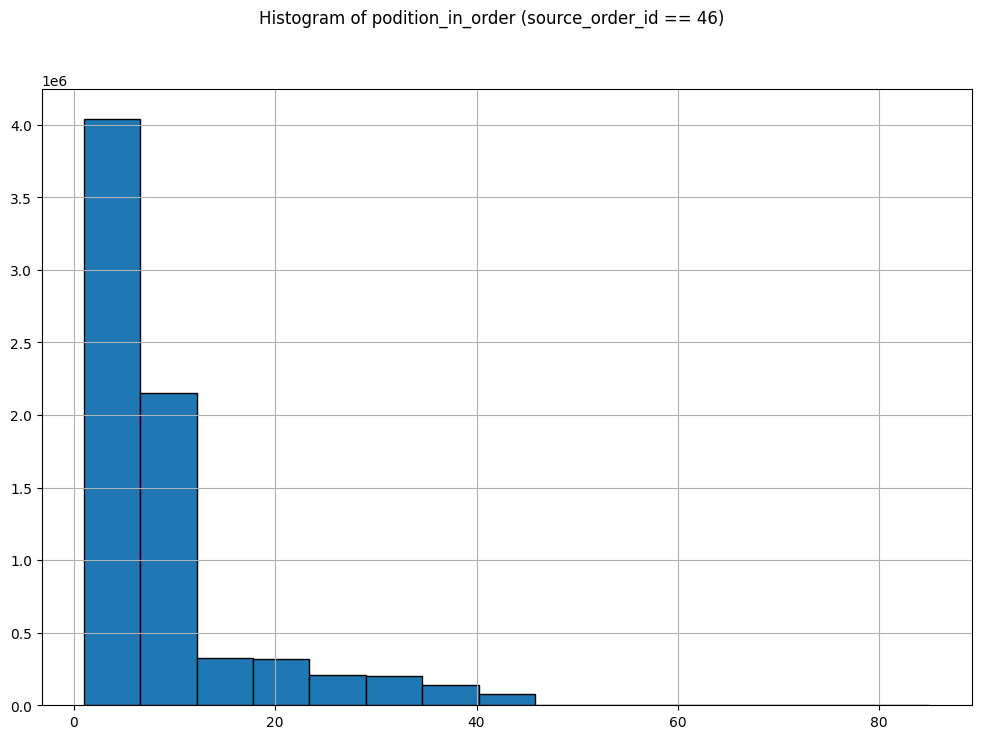

In [78]:
pick_data[pick_data["source_order_id"]=="46"]["position_in_order"].hist(bins=15, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histogram of podition_in_order (source_order_id == 46)')
plt.show()

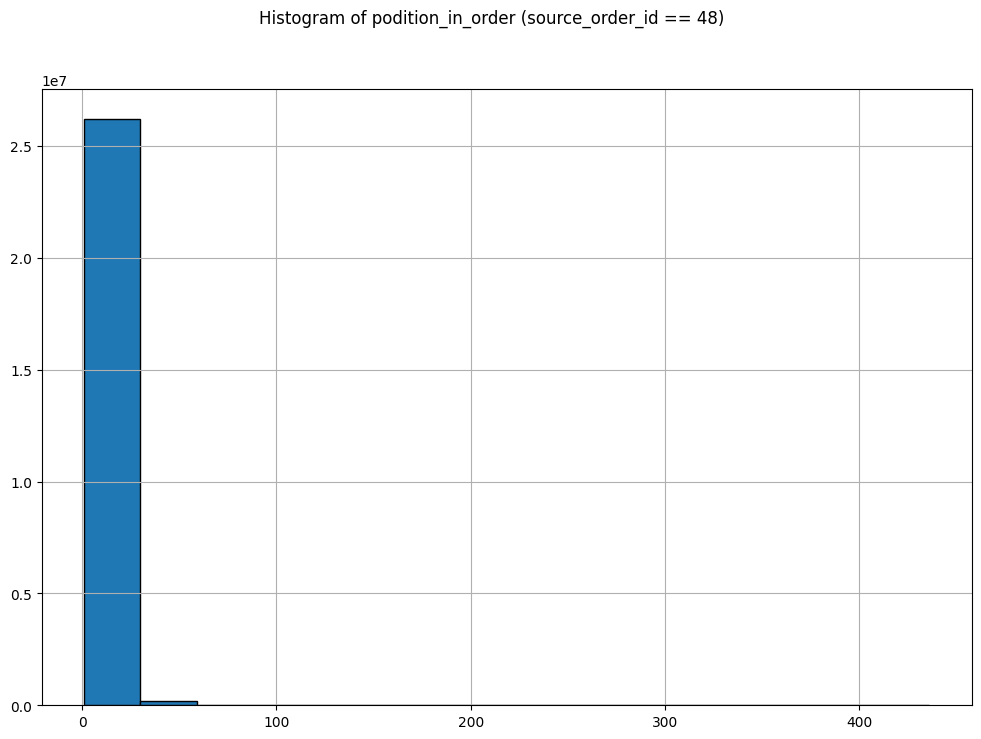

In [79]:
pick_data[pick_data["source_order_id"]=="48"]["position_in_order"].hist(bins=15, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histogram of podition_in_order (source_order_id == 48)')
plt.show()

* We will execute the analysis within each **source_order_id** separately and mark the outliers

##### Flag (5): Outliers in position_in_order

Mark outliers based on z-values within each source_order_id value (46, 48)

In [80]:
# initialize flag_5
pick_data['flag_5'] = 0

# for loop over source_order_id column
for i in pick_data["source_order_id"].unique():

    # calculate the mean and standard deviation for a column
    mean = pick_data[pick_data["source_order_id"]==i]["position_in_order"].mean()
    std_dev = pick_data[pick_data["source_order_id"]==i]["position_in_order"].std()

    # create a mask for outliers: True where any value in the row is above 3 standard deviations
    outlier_mask = (pick_data[pick_data["source_order_id"]==i]["position_in_order"] - mean).abs() > 3 * std_dev

    # add a new "flag_5" column that marks rows with any outlier as 1, otherwise 0
    pick_data["flag_5"] = pick_data["flag_5"] | outlier_mask.astype(int)

/var/folders/0m/9hrzmrmx5rvbnxjrsct8cd500000gn/T/ipykernel_4751/411847888.py:15: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  pick_data["flag_5"] = pick_data["flag_5"] | outlier_mask.astype(int)
/var/folders/0m/9hrzmrmx5rvbnxjrsct8cd500000gn/T/ipykernel_4751/411847888.py:15: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  pick_data["flag_5"] = pick_data["flag_5"] | outlier_mask.astype(int)


Convert True & False to 1 & 0

In [81]:
pick_data["flag_5"] = pick_data["flag_5"].astype(int)

In [82]:
print(pick_data[(pick_data["flag_5"]==1) & (pick_data["source_order_id"]=="46")]["position_in_order"].min())

35


* The **minimum porision_in_order value** in **source_order_id 46** is **35**

In [83]:
print(pick_data[(pick_data["flag_5"]==1) & (pick_data["source_order_id"]=="48")]["position_in_order"].min())

23


* The **minimum porision_in_order value** in **source_order_id 48** is **23**

#### pick_volume

> Remember that the **pick_volume** from a **single product_id** can be measured with **different quantity_unit**

Check value ranges over **pick_volume** the dataframe

In [89]:
print(pick_data["pick_volume"].min())
print(pick_data["pick_volume"].max())

-2000
200000


* The range in **pick_volumne** must be greater than 0 

Check the dataframe filtered by **undesired pick_volume range**

In [90]:
pick_data[pick_data["pick_volume"]<=0]

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,flag_1,flag_2,flag_3,flag_4,flag_5,year
107,32,AKL,48,6183218,18,0,St,2017-01-17 00:32:10,1,0,0,0,0,2017
115,32,AKL,48,6183218,18,0,St,2017-01-17 00:35:46,1,0,0,0,0,2017
465,77,AKL,48,7746735,3,0,St,2017-11-08 22:43:16,1,0,0,0,0,2017
678,104,AKL,48,8221188,2,0,St,2018-02-01 21:34:15,0,0,0,0,0,2018
682,104,AKL,48,8221188,2,0,St,2018-02-01 21:44:30,0,0,0,0,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33875618,361725,HRL,46,6100367,3,0,St,2016-12-27 05:35:49,0,0,0,0,0,2016
33875708,F23374,AKL,46,6100489,1,0,St,2016-12-27 05:42:42,0,0,0,0,0,2016
33875866,392445,AKL,46,6105118,3,0,Pa,2016-12-28 22:28:11,0,0,0,0,0,2016
33879292,855802,AKL,48,4170783,4,0,St,2016-12-29 17:08:01,1,0,0,0,0,2016


* There are **190.371 registers** that are **adding noise** to the dataframe

Identify the **warehouses** an **years** responsable from this **product_id** invalid **pick_volume** values

* Values == 0

In [91]:
pick_data[pick_data["pick_volume"]==0].pivot_table(
    index=["category", "year"],
    columns="source_order_id",
    values="product_id",
    aggfunc="count")

source_order_id       46       48
category   year                  
AKL        2011  17071.0  26156.0
           2012  27678.0  38178.0
           2013  15630.0  16871.0
           2014   7358.0   4838.0
           2015   8544.0   4923.0
           2016   6000.0   2231.0
           2017   2536.0    791.0
           2018    577.0    853.0
           2019    241.0    636.0
           2020     55.0    328.0
HRL        2011     36.0    164.0
           2012     66.0    297.0
           2013     32.0    177.0
           2014     33.0    209.0
           2015     28.0    130.0
           2016     34.0    135.0
           2017     31.0    129.0
           2018     31.0    122.0
           2019     62.0    254.0
           2020     29.0    120.0
Kabellager 2011      NaN      8.0
           2012      NaN     52.0
           2018      NaN      2.0
           2019      NaN      1.0
           2020      NaN      1.0
Manuell    2011     59.0    411.0
           2012    100.0    621.0
           2013     41.0    297.0
           2014     51.0    434.0
           2015     49.0    393.0
           2016     26.0    261.0
           2017     26.0    261.0
           2018     55.0    466.0
           2019     73.0   1266.0
           2020     25.0    569.0
SHL        2015     45.0     72.0
           2016     51.0    291.0
           2017     20.0     89.0
           2018     11.0    143.0
           2019     21.0    172.0
           2020     10.0    184.0

* We see that most of the zero values in pick_volume values are located in ALK
* This happens during mostly during the years 2011-2013

In [92]:
pick_data[pick_data["pick_volume"]==0].pivot_table(
    index=["category"],
    columns="source_order_id",
    values="product_id",
    aggfunc="count")

source_order_id,46,48
category,,
AKL,85690.0,95805.0
HRL,382.0,1737.0
Kabellager,NaN,64.0
Manuell,505.0,4979.0
SHL,158.0,951.0


* We see that zero pick_volume values appear mostly in source_order_id = 48

In [93]:
len(pick_data[pick_data["pick_volume"]==0])

190271

* **190.271** registers with **zero** value in **pick_volume**

##### Flag (6): Zero value registers in pick_volume

In [94]:
# create flag 6
pick_data["flag_6"] = (pick_data["pick_volume"] == 0).astype(int)

In [95]:
len(pick_data[pick_data["flag_6"]==1])

190271

Identify the **warehoses** responsable from this **product_id** invalid **pick_volume** values (negative)

* Values < 0

In [96]:
pick_data[pick_data["pick_volume"]<0].pivot_table(
    index=["category", "year"],
    columns="source_order_id",
    values="product_id",
    aggfunc="count")

source_order_id  46  48
category year          
SHL      2015     3  17
         2016     4  76

In [97]:
len(pick_data[pick_data["pick_volume"]<0])

100

> All 100 **negative pick_volume** are alocated in **SHL**

##### Flag (7): Negative values in pick_volume

In [98]:
# create flag 7
pick_data["flag_7"] = (pick_data["pick_volume"] < 0).astype(int)

In [99]:
len(pick_data[pick_data["flag_7"]==1])

100

_____________

#### PARTIAL CSV WRITING

Check dataframe

In [100]:
pick_data.head(1)

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,flag_1,flag_2,flag_3,flag_4,flag_5,year,flag_6,flag_7
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24,0,0,0,0,0,2017,0,0


Drop unwanted columns

In [101]:
pick_data.drop(columns=["year", "pick_id"], inplace = True)

Write csv file

In [102]:
pick_data.to_csv("pick_data_upload.csv", index=False)

Check that csv file is well written

In [103]:
pick_dataest = pd.read_csv("pick_data_upload.csv")
pick_dataest.head()

/var/folders/0m/9hrzmrmx5rvbnxjrsct8cd500000gn/T/ipykernel_4751/1971021354.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  pick_dataest = pd.read_csv("pick_data_upload.csv")


,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24,0,0,0,0,0,0,0
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35,0,0,0,0,0,0,0
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50,0,0,0,0,0,0,0
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51,0,0,0,0,0,0,0
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02,0,0,0,0,0,0,0


____________

##### Flag (8): Outliers in pick_volume

In [ ]:
# create a control variable of number of general outliers
control_outlier = []

# initialize flag_8
pick_data['flag_8'] = 0

# create a loop to track product_id outliers
product_unique_list = pick_data.product_id.unique()

# for loop over quantity units
for i in product_unique_list:

    # get unique df of pick_volume values from product_id
    # AVOID FLAG 3: PRODUCT_ID WITH DIFFERENT QUANTITY UNITS
    # AVOID FLAG 6: ZERO PICK_VOLUME
    # AVOID FLAG 7: NEGATIVE PICK_VOLUME
    product_i = pick_data[(pick_data["product_id"]==i) &
                          (pick_data["flag_3"]==0) &
                          (pick_data["flag_6"]==0) &
                          (pick_data["flag_7"]==0)]
    
    # calculate the mean and standard deviation for a column
    mean = product_i.pick_volume.mean()
    std_dev = product_i.pick_volume.std()

    # create a mask for outliers: True where any value in the row is above 3 standard deviations
    outlier_mask = (product_i.pick_volume - mean).abs() > 3 * std_dev

    # add a new "flag_8" column that marks rows with any outlier as 1, otherwise 0
    pick_data["flag_8"] = pick_data["flag_8"] | outlier_mask.astype(int)
    
    clear_output()
    
    # print total progress
    print("Total progress: ", round(len(control_outlier)/len(product_unique_list),2), "%")
    
    # print total marked values
    control_outlier.append(len(pick_data[pick_data["flag_8"]==1]))
    print(control_outlier[-1])

## Upload

Write csv file

In [55]:
pick_data.to_csv("pick_data_upload.csv", index=False)

Check that csv file is well written

In [ ]:
pick_dataest = pd.read_csv("pick_data_upload.csv")
pick_dataest.head()

## Paralel Work

### Nacho

I need from Python a **csv** file with only the **order_number** column.

Basically I need to:

    * Take this column from the DataFrame
    * Remove duplicates
    * Sort the values
    * Same the file with the name "picks_orders".


In [67]:
# # create set list of unique values of column order_number
# order_number_set_list = list(set(list(pick_data["order_number"].values)))
# order_number_set_list = sorted(order_number_set_list)

# # convert the list into a data frame
# pick_data_order_number_set_list = pd.DataFrame(order_number_set_list, columns=["order_number"])

# # define the csv file name
# filename = "picks_orders.csv"

# # write the data frame to a csv file
# pick_data_order_number_set_list.to_csv(filename, index=False)